# Neural network on CIFAR10 dataset

In [3]:
import tensorflow as tf
from tensorflow import keras

(X_train_full, y_train_full), (X_test_full, y_test_full) = keras.datasets.cifar10.load_data()

/home/sean/anaconda3/envs/hands_on_machine_learning/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


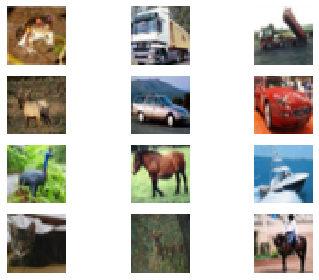

In [4]:
import matplotlib.pyplot as plt

cols = 3
rows = 4

f, axarr = plt.subplots(rows, cols)
[axi.set_axis_off() for axi in axarr.ravel()]

for i in range(cols*rows):
    axarr[int(i/cols), i%cols].imshow(X_train_full[i,:,:,:])
f.tight_layout()
f.show()

## Create a validation set & scale the data

In [5]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import numpy as np

num_classes=10
boundary = 40000

X_train = X_train_full[:boundary].astype(np.float32)
y_train = to_categorical(y_train_full[:boundary], num_classes=num_classes)

X_val = X_train_full[boundary:].astype(np.float32)
y_val = to_categorical(y_train_full[boundary:], num_classes=num_classes)

X_test = X_test_full.astype(np.float32)
y_test = to_categorical(y_test_full, num_classes=num_classes)

X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_val)
X_val = scaler.transform(X_val)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

print('\nTrain')
print(X_train.shape, X_train.dtype)
print(y_train.shape, y_train.dtype)

print('\nVal')
print(X_val.shape, X_val.dtype)
print(y_val.shape, y_val.dtype)

print('\nTest')
print(X_test.shape, X_test.dtype)
print(y_test.shape, y_test.dtype)

print('\nMean values:')
print(X_train.mean())
print(X_val.mean())
print(X_test.mean())

print('\nStd devs')
print(X_train.std())
print(X_val.std())
print(X_test.std())


Train
(40000, 3072) float32
(40000, 10) float32

Val
(10000, 3072) float32
(10000, 10) float32

Test
(10000, 3072) float32
(10000, 10) float32

Mean values:
-1.4652809e-09
1.1046728e-09
-1.707077e-08

Std devs
1.0000015
1.000001
0.9999999


## Build a neural network

In [2]:
num_neurons = 100
layers = 20

model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
# model.add(keras.layers.Dropout(rate=0.2))
# model.add(keras.layers.BatchNormalization())

for _ in range(layers):
    model.add(keras.layers.Dense(num_neurons, activation='elu', kernel_initializer='he_uniform'))
    # model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.BatchNormalization())
    
model.add(keras.layers.Dense(num_classes, activation='softmax')) # predict prob of being of class

NameError: name 'keras' is not defined

## Compile the model

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Nadam(lr=0.002),
              metrics=['accuracy'])

## Set up TensorBoard & callbacks

In [20]:
import os
import time

root_logdir = os.path.join(os.curdir, 'my_logs')  # Specify where to store the log files

def get_run_log_dir(logdir):
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')  # Use the date/time so all logs are kept
    return os.path.join(logdir, run_id)

checkpoint_cb = keras.callbacks.ModelCheckpoint('best_mnist_model.h5', save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(get_run_log_dir(root_logdir))

## Train the model

In [21]:
history = model.fit(X_train, y_train, 
                    epochs=30, 
                    validation_data=(X_val, y_val),
                    batch_size=64,
                    callbacks=[tensorboard_cb, checkpoint_cb])

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 19s 485us/sample - loss: 1.8635 - accuracy: 0.3336 - val_loss: 1.7775 - val_accuracy: 0.3825
Epoch 2/30
40000/40000 [==============================] - 9s 231us/sample - loss: 1.6540 - accuracy: 0.4094 - val_loss: 1.6195 - val_accuracy: 0.4339
Epoch 3/30
40000/40000 [==============================] - 10s 257us/sample - loss: 1.5673 - accuracy: 0.4437 - val_loss: 1.5996 - val_accuracy: 0.4554
Epoch 4/30
40000/40000 [==============================] - 9s 230us/sample - loss: 1.5058 - accuracy: 0.4674 - val_loss: 1.6490 - val_accuracy: 0.4346
Epoch 5/30
40000/40000 [==============================] - 9s 234us/sample - loss: 1.4482 - accuracy: 0.4878 - val_loss: 1.5362 - val_accuracy: 0.4678
Epoch 6/30
40000/40000 [==============================] - 9s 228us/sample - loss: 1.4098 - accuracy: 0.5029 - val_loss: 1.5111 - val_accuracy: 0.4908
Epoch 7/30
40000/40000 [========================

## Make predictions without dropout

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

## Make predictions with MC dropout

In [ ]:
from sklearn.metrics import accuracy_score

print(X_test.shape)
print(model(X_test, training=True).shape)
y_probas = []
for _ in range(20):
    y_probas.append(model(X_test, training=True))
print(np.array(y_probas).shape)
y_proba = np.array(y_probas).mean(axis=0)
print(y_proba.shape)
y_pred = np.argmax(y_proba, axis=1)
print(y_pred.shape)
accuracy_score(y_pred, y_test)